<a href="https://colab.research.google.com/github/SadhIhfa/test/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Long short term memory (lstm)
the goal is to predict the closing stock price of NVDA using the past 90 days stock price

In [2]:
#Import libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

Stock

In [3]:
#Get the stock data
sp = yf.Ticker("^GSPC")
sp = sp.history(period="max")

Show the data

In [4]:
sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,0.0,0.0
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,0.0,0.0
2023-08-17 00:00:00-04:00,4416.319824,4421.169922,4364.830078,4370.359863,3943700000,0.0,0.0


In [5]:
sp.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-08-08 00:00:00-04:00', '2023-08-09 00:00:00-04:00',
               '2023-08-10 00:00:00-04:00', '2023-08-11 00:00:00-04:00',
               '2023-08-14 00:00:00-04:00', '2023-08-15 00:00:00-04:00',
               '2023-08-16 00:00:00-04:00', '2023-08-17 00:00:00-04:00',
               '2023-08-18 00:00:00-04:00', '2023-08-21 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24024, freq=None)

Visualize the Close price history

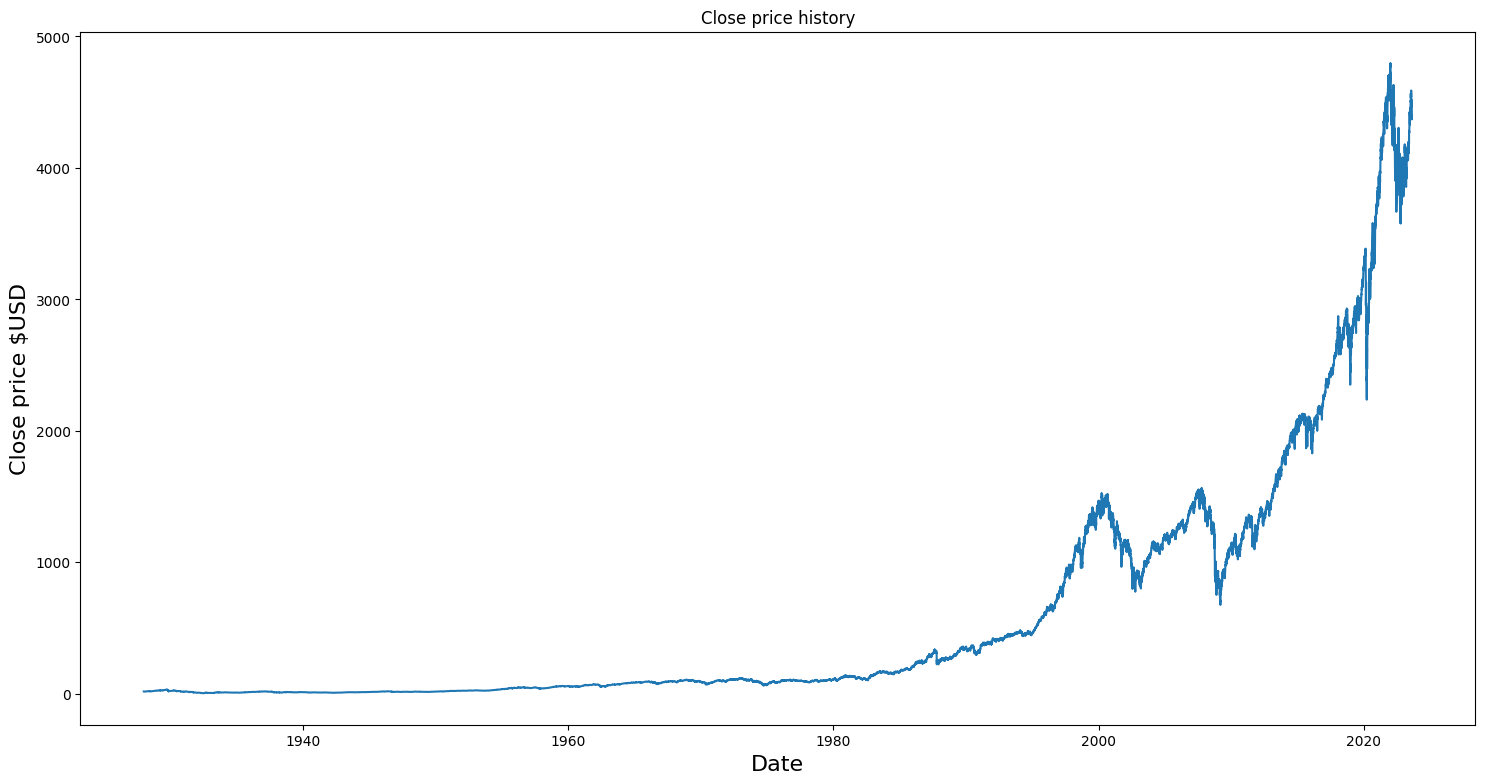

In [6]:
plt.figure(figsize=(18,9))
plt.title('Close price history')
plt.plot(sp['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close price $USD', fontsize=16)
plt.show()

In [ ]:
#Clean the data deleting the useless columns
del sp["Dividends"]
del sp["Stock Splits"]

In [7]:
#Create a new column called tomorrow that will help training the model
sp["Tomorrow"] = sp["Close"].shift(-1)

sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000
...,...,...,...,...,...,...,...,...
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,0.0,0.0,4404.330078
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,0.0,0.0,4370.359863
2023-08-17 00:00:00-04:00,4416.319824,4421.169922,4364.830078,4370.359863,3943700000,0.0,0.0,4369.709961


In [8]:
#Create a new column called Objective that will help training the model
sp["Objective"] = (sp["Tomorrow"] > sp["Close"]).astype(int)

sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Objective
Date,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000,0
...,...,...,...,...,...,...,...,...,...
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,0.0,0.0,4404.330078,0
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,0.0,0.0,4370.359863,0
2023-08-17 00:00:00-04:00,4416.319824,4421.169922,4364.830078,4370.359863,3943700000,0.0,0.0,4369.709961,0


In [9]:
#I will use data from 1990 forward to train the model so the old data will be deleted
sp = sp.loc["1990-01-01":].copy()

In [10]:
#Build the model
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=300, min_samples_split=100, random_state=79)

train = sp.iloc[:-100]
test = sp.iloc[-100:]

#Select the columns that will be used as predictors making sure of not create a leakage using the tomorrow and objective column because that will give the model future infomation
#and that is imposible to replicate in the real world
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Objective"])

RandomForestClassifier(min_samples_split=100, n_estimators=300, random_state=79)

In [11]:
#import precision score this metric is going to be used to verifi how acurrate the predictions are
from sklearn.metrics import precision_score

predictions = model.predict(test[predictors])

In [12]:
predictions = pd.Series(predictions, index=test.index)

In [13]:
predictions

Date
2023-03-29 00:00:00-04:00    0
2023-03-30 00:00:00-04:00    0
2023-03-31 00:00:00-04:00    0
2023-04-03 00:00:00-04:00    0
2023-04-04 00:00:00-04:00    1
                            ..
2023-08-15 00:00:00-04:00    1
2023-08-16 00:00:00-04:00    1
2023-08-17 00:00:00-04:00    1
2023-08-18 00:00:00-04:00    1
2023-08-21 00:00:00-04:00    0
Length: 100, dtype: int64

In [14]:
precision_score(test["Objective"], predictions)

0.5737704918032787

In [15]:
combined = pd.concat([test["Objective"], predictions], axis=1)

<Axes: xlabel='Date'>

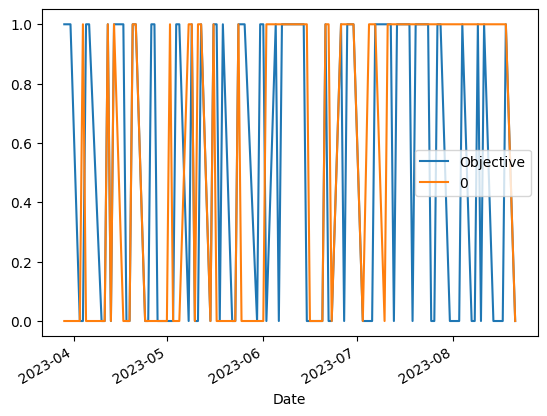

In [16]:
combined.plot()

In [17]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Objective"])
    predictions = model.predict(test[predictors])
    predictions = pd.Series(predictions, index=test.index, name="Predictions")
    combined = pd.concat([test["Objective"], predictions], axis=1)
    return combined

In [18]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [19]:
predictions = backtest(sp, model, predictors)

In [20]:
predictions["Predictions"].value_counts()

0    3397
1    2577
Name: Predictions, dtype: int64

In [21]:
precision_score(predictions["Objective"], predictions["Predictions"])

0.5281334885525805

In [22]:
predictions["Objective"].value_counts() / predictions.shape[0]

1    0.533646
0    0.466354
Name: Objective, dtype: float64

In [23]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp.rolling (horizon).mean()

    ratio_column=f"Close_Ratio_{horizon}"
    sp [ratio_column] = sp["Close"] / rolling_averages["Close"]

    trend_column= f"Trend_{horizon}"
    sp [trend_column] = sp.shift(1).rolling(horizon).sum()["Objective"]

    new_predictors += [ratio_column, trend_column]

In [24]:
sp = sp.dropna()
sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Objective,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,0.0,0.0,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,0.0,0.0,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,0.0,0.0,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,0.0,0.0,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,0.0,0.0,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,0.0,0.0,4437.859863,0,1.002867,1.0,1.002631,2.0,1.020476,34.0,1.103469,120.0,1.169828,534.0
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,0.0,0.0,4404.330078,0,0.994191,1.0,0.993780,2.0,1.007773,33.0,1.090581,119.0,1.155837,534.0
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,0.0,0.0,4370.359863,0,0.996208,0.0,0.989080,2.0,0.999356,33.0,1.082203,119.0,1.146648,533.0


In [25]:
model = RandomForestClassifier(n_estimators= 500, min_samples_split= 75, random_state=79)

In [26]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Objective"])
    predictions = model.predict_proba(test[predictors])[:,1]
    predictions[predictions >= .6] = 1
    predictions[predictions < .6] = 0
    predictions = pd.Series(predictions, index=test.index, name="Predictions")
    combined = pd.concat([test["Objective"], predictions], axis=1)
    return combined

In [ ]:
predictions = backtest(sp, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Objective"], predictions["Predictions"])